In [1]:
# All the necesarry libraries
import pandas as pd
import zipfile
import os
import random
import torch
from ultralytics import YOLOWorld
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from torchvision import models
from IPython.display import display
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

In [2]:
# Define paths
root_dir = '/home/catalin/proiect'
v1_dir = os.path.join(root_dir, 'detailed_weldings2')

Displaying some training images from version 1:


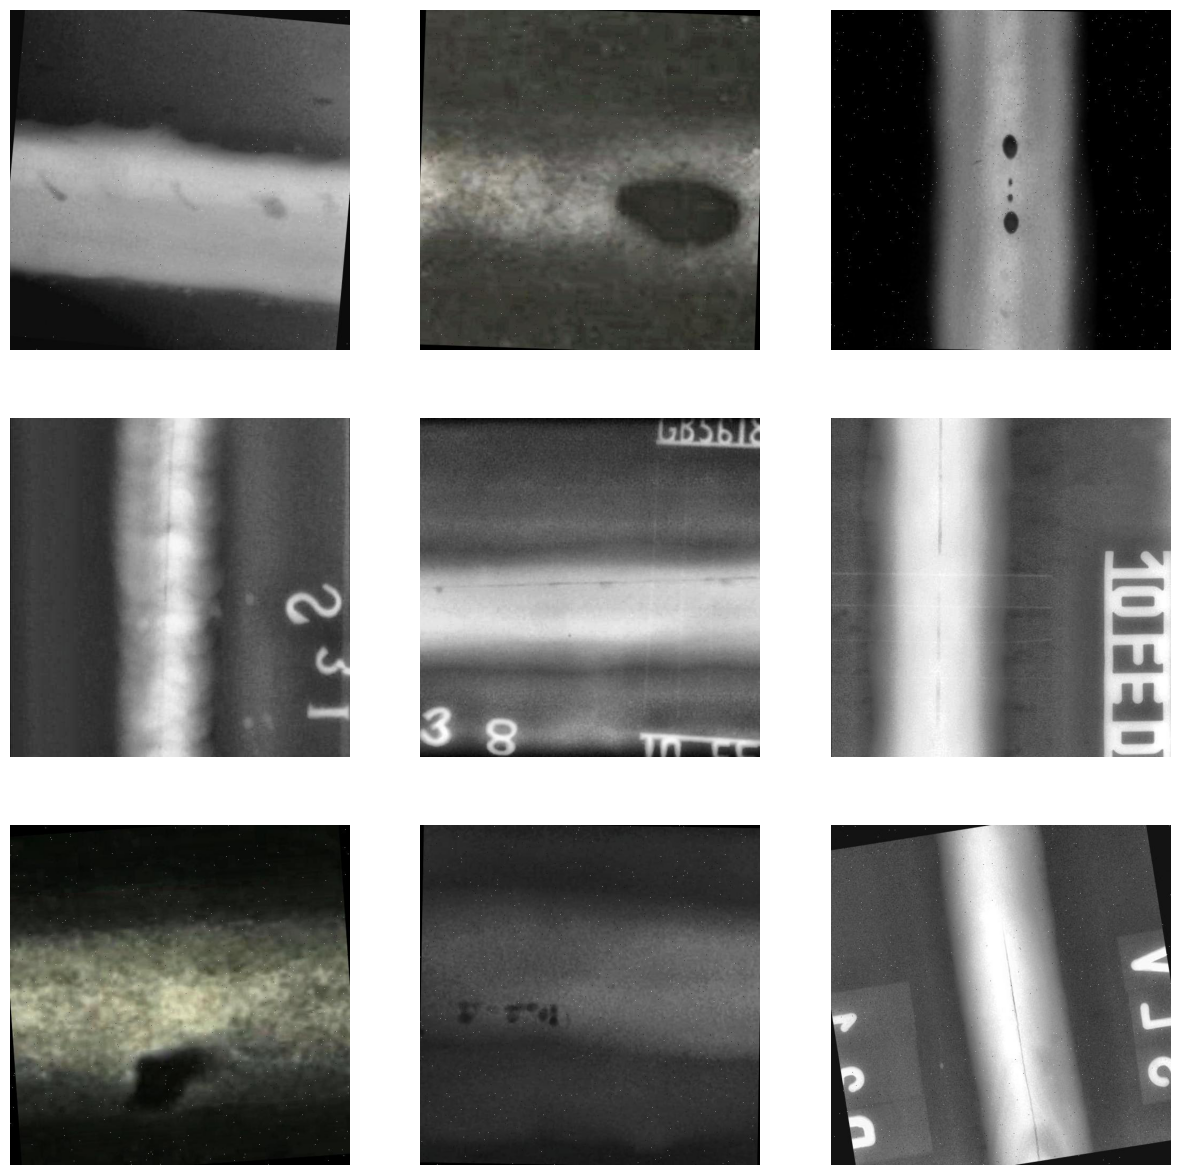

In [3]:
# Function to display images, modify num_images to show how much images you want
def display_images(image_dir, num_images=9):
    images = os.listdir(image_dir)
    sample_images = random.sample(images, num_images)
    plt.figure(figsize=(15, 15))
    for i, image_name in enumerate(sample_images):
        image_path = os.path.join(image_dir, image_name)
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_rgb)
        plt.axis('off')
    plt.show()

# Display some training images
print("Displaying some training images from version 1:")
display_images(os.path.join(v1_dir, 'train/images'))

In [4]:
def update_data_yaml(data_yaml_path, base_dir):

    data_yaml_path = os.path.expanduser(data_yaml_path)
    base_dir = os.path.expanduser(base_dir)
    
    # Read file data.yaml
    with open(data_yaml_path, 'r') as file:
        data_yaml = file.read()
    
    # update file paths
    data_yaml = data_yaml.replace('../train/images', os.path.join(base_dir, 'train/images'))
    data_yaml = data_yaml.replace('../valid/images', os.path.join(base_dir, 'valid/images'))
    data_yaml = data_yaml.replace('../test/images', os.path.join(base_dir, 'test/images'))
    
    # Write updates
    with open(data_yaml_path, 'w') as file:
        file.write(data_yaml)

# paths
data_yaml_path = '/home/catalin/proiect/detailed_weldings2/data.yaml'
base_dir = '/home/catalin/proiect/detailed_weldings2'

# Update file data.yaml
update_data_yaml(data_yaml_path, base_dir)

# Check results
def print_data_yaml(data_yaml_path):
    data_yaml_path = os.path.expanduser(data_yaml_path)
    with open(data_yaml_path, 'r') as file:
        print(file.read())

print("Updated data.yaml:")
print_data_yaml(data_yaml_path)


Updated data.yaml:
train: /home/catalin/proiect/detailed_weldings2/train/images
val: /home/catalin/proiect/detailed_weldings2/valid/images
test: /home/catalin/proiect/detailed_weldings2/test/images

nc: 4
names: ['Crack', 'LoP-LoF', 'Pore', 'Slag']

roboflow:
  workspace: george-catalin-nitu
  project: demo_1-9tvhj-viega
  version: 1
  license: CC BY 4.0
  url: https://app.roboflow.com/george-catalin-nitu/demo_1-9tvhj-viega/1


In [5]:
import gc
gc.collect()

17752

In [6]:
# EDA and Preprocessing
def load_labels(label_dir):
    label_files = os.listdir(label_dir)
    data = []
    for label_file in label_files:
        with open(os.path.join(label_dir, label_file), 'r') as file:
            lines = file.readlines()
            for line in lines:
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                data.append([label_file, class_id, x_center, y_center, width, height])
    df = pd.DataFrame(data, columns=['file', 'class_id', 'x_center', 'y_center', 'width', 'height'])
    return df

v1_train_labels = load_labels(os.path.join(v1_dir, 'train/labels'))
v1_valid_labels = load_labels(os.path.join(v1_dir, 'valid/labels'))
v1_test_labels = load_labels(os.path.join(v1_dir, 'test/labels'))

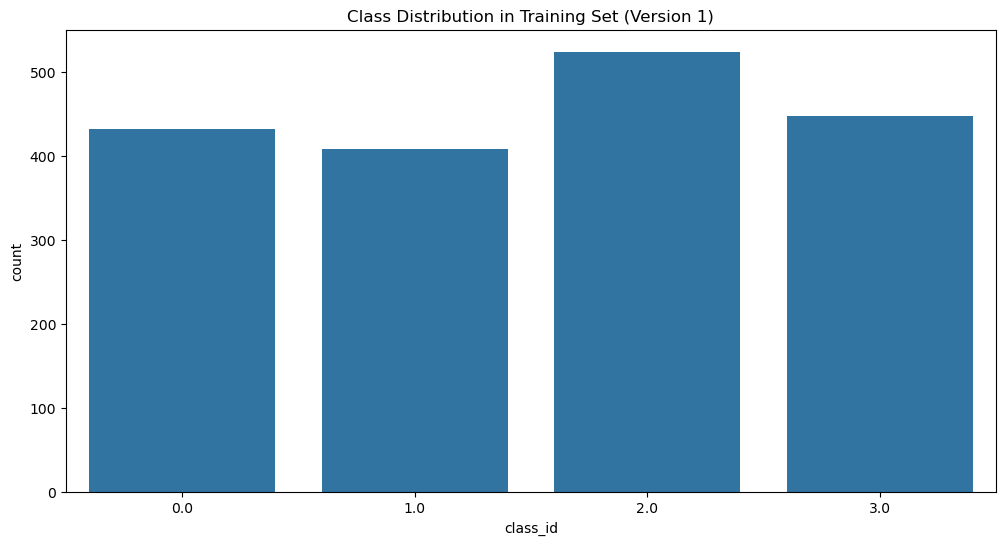

In [7]:
# Plot class distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=v1_train_labels, x='class_id')
plt.title('Class Distribution in Training Set (Version 1)')
plt.show()

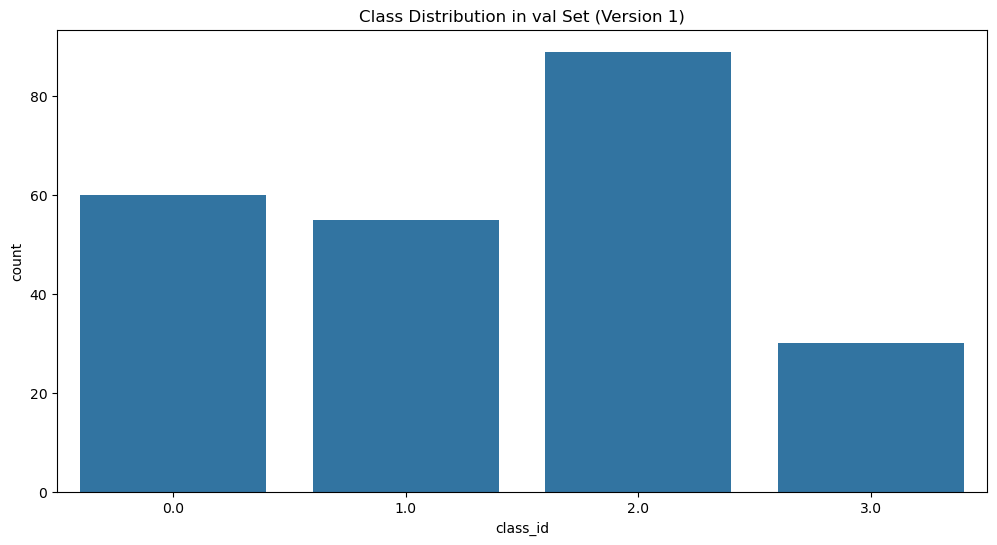

In [8]:
# Plot class distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=v1_valid_labels, x='class_id')
plt.title('Class Distribution in val Set (Version 1)')
plt.show()

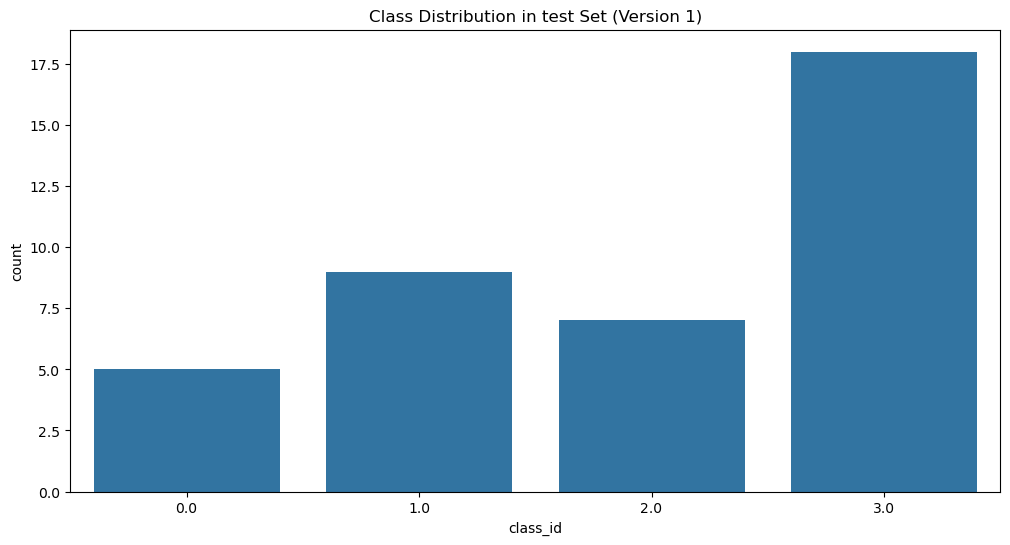

In [ ]:
# Plot class distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=v1_test_labels, x='class_id')
plt.title('Class Distribution in test Set (Version 1)')
plt.show()

In [10]:
from ultralytics import YOLO
model = YOLO('yolov8m.pt') 

100%|██████████| 49.7M/49.7M [00:01<00:00, 30.8MB/s]


In [11]:
results = model.train(data='/home/catalin/proiect/detailed_weldings2/data.yaml', epochs=100, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.15 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/catalin/proiect/detailed_weldings2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, e

  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384, 576, 3, 2]              
  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /home/catalin/proiect/detailed_weldings2/train/labels.cache... 936 images, 3 backgrounds, 0 corrupt: 100%|██████████| 936/936 [00:00<?, ?it/s]
val: Scanning /home/catalin/proiect/detailed_weldings2/valid/labels.cache... 109 images, 0 backgrounds, 0 corrupt: 100%|██████████| 109/109 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.81G      2.305      3.628      2.081         26        640: 100%|██████████| 59/59 [00:06<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.40it/s]

                   all        109        234      0.205      0.367      0.163     0.0528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       7.1G       2.08      2.495       1.93         23        640: 100%|██████████| 59/59 [00:05<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.21it/s]

                   all        109        234      0.206      0.321      0.205     0.0738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.03G      2.061       2.44      1.936         16        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]

                   all        109        234      0.137      0.344      0.113     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.09G      2.049      2.333      1.943         31        640: 100%|██████████| 59/59 [00:05<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.32it/s]

                   all        109        234      0.269      0.297      0.169     0.0467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.99G      2.016       2.24      1.919         17        640: 100%|██████████| 59/59 [00:05<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.08it/s]

                   all        109        234       0.24       0.46      0.261      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.05G      1.965      2.087      1.888         21        640: 100%|██████████| 59/59 [00:05<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.99it/s]

                   all        109        234      0.374      0.477      0.383       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.07G      1.952      2.073      1.838         46        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.71it/s]

                   all        109        234      0.423      0.424      0.385      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       7.1G      1.919       1.95      1.812         24        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.87it/s]

                   all        109        234      0.369      0.478      0.314      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         7G      1.899      1.981      1.787         20        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.74it/s]

                   all        109        234      0.392      0.504      0.417      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.07G      1.866      1.878      1.781         30        640: 100%|██████████| 59/59 [00:05<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.59it/s]

                   all        109        234      0.416      0.587      0.452       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.07G      1.842      1.834      1.749         45        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.87it/s]

                   all        109        234      0.558      0.538      0.541      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.09G      1.801      1.706      1.726         21        640: 100%|██████████| 59/59 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.95it/s]

                   all        109        234      0.528      0.609      0.569      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.99G      1.792      1.694      1.702         17        640: 100%|██████████| 59/59 [00:05<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.66it/s]

                   all        109        234       0.48      0.605       0.55      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.12G      1.803      1.685      1.739         24        640: 100%|██████████| 59/59 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.88it/s]

                   all        109        234      0.572      0.641      0.628      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.08G      1.759      1.645      1.691         27        640: 100%|██████████| 59/59 [00:05<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.33it/s]

                   all        109        234      0.656       0.64      0.651      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.11G      1.739      1.649      1.689         33        640: 100%|██████████| 59/59 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.13it/s]

                   all        109        234      0.527      0.612      0.593      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.98G      1.713      1.574      1.654         24        640: 100%|██████████| 59/59 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.13it/s]

                   all        109        234      0.712      0.604      0.647      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.12G       1.71      1.569      1.671         27        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.76it/s]

                   all        109        234      0.645      0.626      0.644      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.09G      1.735      1.556      1.672         24        640: 100%|██████████| 59/59 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.25it/s]

                   all        109        234      0.702      0.645      0.686      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.08G      1.716      1.532      1.656         33        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.70it/s]

                   all        109        234      0.747      0.634       0.69      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.98G      1.686      1.501      1.613         25        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.91it/s]

                   all        109        234      0.587      0.717      0.677      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.12G      1.739      1.476      1.654         10        640: 100%|██████████| 59/59 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.92it/s]

                   all        109        234      0.655      0.612      0.657      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.09G       1.67      1.463      1.626         39        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.20it/s]

                   all        109        234      0.748      0.678      0.705      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.08G      1.644       1.43        1.6         27        640: 100%|██████████| 59/59 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.25it/s]

                   all        109        234      0.692      0.672      0.716      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         7G      1.683      1.477      1.623         11        640: 100%|██████████| 59/59 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.83it/s]

                   all        109        234      0.715      0.665       0.73      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.11G      1.671       1.41      1.626         26        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.13it/s]

                   all        109        234      0.742      0.646      0.743      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.09G      1.642       1.42      1.611         21        640: 100%|██████████| 59/59 [00:05<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.72it/s]

                   all        109        234      0.718      0.719      0.735      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.09G      1.639      1.359      1.585         30        640: 100%|██████████| 59/59 [00:05<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.79it/s]

                   all        109        234      0.818      0.668      0.721      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.99G      1.651      1.385      1.596         22        640: 100%|██████████| 59/59 [00:05<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.92it/s]

                   all        109        234      0.713      0.704      0.718       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.08G      1.628      1.373      1.574         23        640: 100%|██████████| 59/59 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.95it/s]

                   all        109        234      0.567      0.638      0.641      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.06G      1.581       1.29      1.558         26        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.30it/s]

                   all        109        234        0.7      0.704      0.728      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.08G      1.637      1.299      1.592         25        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.35it/s]

                   all        109        234      0.705      0.716      0.716      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.02G      1.595       1.27      1.549         39        640: 100%|██████████| 59/59 [00:05<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.32it/s]

                   all        109        234      0.682      0.745      0.732      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.07G      1.596      1.285      1.558         29        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.25it/s]

                   all        109        234      0.742      0.706      0.731      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.07G      1.593      1.229      1.539         28        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.21it/s]

                   all        109        234      0.724      0.713      0.753      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       7.1G      1.594      1.269      1.566         36        640: 100%|██████████| 59/59 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.53it/s]

                   all        109        234      0.736      0.747      0.789      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.98G      1.581      1.248      1.539         13        640: 100%|██████████| 59/59 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.28it/s]

                   all        109        234      0.719      0.684       0.71      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.07G      1.584       1.24      1.548         20        640: 100%|██████████| 59/59 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.34it/s]

                   all        109        234      0.725       0.71      0.716      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.09G      1.576      1.209      1.527         29        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.26it/s]

                   all        109        234      0.795      0.711       0.76      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.07G      1.546      1.229      1.524         27        640: 100%|██████████| 59/59 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.32it/s]

                   all        109        234      0.788      0.751      0.792      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         7G      1.542      1.182      1.526         23        640: 100%|██████████| 59/59 [00:05<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.30it/s]

                   all        109        234      0.761       0.74      0.789      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.07G      1.535      1.151       1.51         17        640: 100%|██████████| 59/59 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.36it/s]

                   all        109        234      0.774       0.72      0.762      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.09G      1.546      1.195      1.527         25        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.24it/s]

                   all        109        234      0.788      0.776      0.798      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.08G      1.559      1.195      1.529         20        640: 100%|██████████| 59/59 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.23it/s]

                   all        109        234      0.792      0.707      0.784      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.01G      1.517      1.152      1.516         26        640: 100%|██████████| 59/59 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.28it/s]

                   all        109        234      0.856      0.721      0.808      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.07G      1.508      1.117      1.486         30        640: 100%|██████████| 59/59 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.34it/s]

                   all        109        234      0.773      0.769      0.793      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.06G      1.491      1.084      1.476         23        640: 100%|██████████| 59/59 [00:06<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.06it/s]

                   all        109        234      0.803      0.782      0.803      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.09G      1.522      1.095      1.505         22        640: 100%|██████████| 59/59 [00:06<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.06it/s]

                   all        109        234      0.788      0.769      0.803      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.98G      1.472      1.061      1.472         21        640: 100%|██████████| 59/59 [00:06<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.14it/s]

                   all        109        234      0.836      0.775      0.826      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.07G      1.493      1.082      1.472         24        640: 100%|██████████| 59/59 [00:06<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.74it/s]

                   all        109        234      0.771      0.773      0.807       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.06G      1.472      1.075      1.449         23        640: 100%|██████████| 59/59 [00:06<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.37it/s]

                   all        109        234      0.813      0.759      0.844      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.07G      1.473      1.084      1.452         23        640: 100%|██████████| 59/59 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.33it/s]

                   all        109        234      0.792      0.811      0.813      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.98G      1.476      1.064      1.483         16        640: 100%|██████████| 59/59 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.14it/s]

                   all        109        234      0.821      0.801      0.829      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.07G      1.434          1      1.426         19        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.34it/s]

                   all        109        234      0.801      0.799      0.833      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.06G      1.484      1.071      1.473         13        640: 100%|██████████| 59/59 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.32it/s]

                   all        109        234      0.817      0.808      0.841      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.08G       1.45      1.017      1.455         36        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.32it/s]

                   all        109        234      0.859      0.785      0.838      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         7G      1.446      1.026      1.453         23        640: 100%|██████████| 59/59 [00:05<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.14it/s]

                   all        109        234       0.81       0.78      0.815      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.08G      1.426      1.005      1.425         26        640: 100%|██████████| 59/59 [00:06<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.42it/s]

                   all        109        234      0.841      0.782      0.816      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.07G      1.401     0.9801      1.423         20        640: 100%|██████████| 59/59 [00:05<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.43it/s]

                   all        109        234      0.816      0.738      0.797      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.08G      1.418     0.9697      1.423         51        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.26it/s]

                   all        109        234      0.803      0.774      0.814      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.98G       1.41      1.025      1.435         26        640: 100%|██████████| 59/59 [00:05<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.32it/s]

                   all        109        234      0.794      0.772       0.81        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.07G      1.408     0.9957      1.414         19        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.40it/s]

                   all        109        234      0.772      0.768      0.792      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.06G      1.379     0.9772      1.413         33        640: 100%|██████████| 59/59 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.39it/s]

                   all        109        234      0.855      0.693      0.794      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       7.1G      1.374     0.9438      1.406         15        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.28it/s]

                   all        109        234      0.836      0.772      0.824      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.99G      1.387     0.9397      1.411         20        640: 100%|██████████| 59/59 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.79it/s]

                   all        109        234      0.811      0.729      0.788      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.07G      1.366     0.9515      1.399         26        640: 100%|██████████| 59/59 [00:05<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.42it/s]

                   all        109        234      0.833      0.792      0.814      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.07G      1.374     0.9289      1.398         32        640: 100%|██████████| 59/59 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.39it/s]

                   all        109        234      0.826      0.783      0.817      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.07G      1.345     0.9073      1.388         18        640: 100%|██████████| 59/59 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.47it/s]

                   all        109        234        0.9      0.754      0.839      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.98G      1.381     0.9423        1.4         29        640: 100%|██████████| 59/59 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.36it/s]

                   all        109        234      0.819      0.793      0.817      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.08G      1.307     0.8878      1.372         16        640: 100%|██████████| 59/59 [00:05<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.43it/s]

                   all        109        234       0.86      0.778      0.831      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.08G       1.33     0.9035      1.377         19        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.77it/s]

                   all        109        234      0.849      0.784      0.844      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.09G      1.327     0.8791      1.369         16        640: 100%|██████████| 59/59 [00:05<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.47it/s]

                   all        109        234      0.821      0.796      0.844      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.99G      1.322      0.873      1.378         29        640: 100%|██████████| 59/59 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.43it/s]

                   all        109        234       0.82      0.767      0.807      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.07G      1.299      0.863       1.36         27        640: 100%|██████████| 59/59 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.40it/s]

                   all        109        234      0.822      0.809      0.837      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.07G      1.298     0.8765      1.349         15        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.32it/s]

                   all        109        234      0.822      0.752      0.802       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.08G      1.292     0.8542      1.352         26        640: 100%|██████████| 59/59 [00:05<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.35it/s]

                   all        109        234      0.809      0.817      0.833      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.03G      1.294     0.8462      1.351         21        640: 100%|██████████| 59/59 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.30it/s]

                   all        109        234      0.788      0.808      0.823      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.09G      1.275     0.8267      1.323         29        640: 100%|██████████| 59/59 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.49it/s]

                   all        109        234      0.862       0.77      0.839      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.07G      1.263      0.828      1.337         23        640: 100%|██████████| 59/59 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.46it/s]

                   all        109        234      0.832      0.808      0.842      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.09G      1.271     0.8462      1.338         32        640: 100%|██████████| 59/59 [00:05<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.88it/s]

                   all        109        234      0.828       0.81      0.817      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.98G      1.234     0.8098      1.327         25        640: 100%|██████████| 59/59 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.38it/s]

                   all        109        234      0.761      0.829      0.817      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.07G      1.249     0.8135      1.315         32        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.47it/s]

                   all        109        234      0.866      0.777      0.825       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.09G      1.233     0.8176      1.306         31        640: 100%|██████████| 59/59 [00:05<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.12it/s]

                   all        109        234      0.853      0.804       0.83      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.08G      1.218     0.7872        1.3         25        640: 100%|██████████| 59/59 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.22it/s]

                   all        109        234      0.908      0.804      0.848      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.02G       1.21     0.8032      1.316         34        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.36it/s]

                   all        109        234      0.868      0.803      0.849      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.07G      1.196     0.7782        1.3         30        640: 100%|██████████| 59/59 [00:05<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.44it/s]

                   all        109        234      0.824      0.802      0.835      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.11G      1.201     0.7908      1.301         30        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.40it/s]

                   all        109        234      0.835      0.805      0.828      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.08G      1.191     0.7592      1.271         32        640: 100%|██████████| 59/59 [00:05<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.44it/s]

                   all        109        234      0.819       0.82      0.844      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.98G      1.206     0.7552      1.296         31        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.46it/s]

                   all        109        234       0.82      0.798      0.834      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.08G      1.187     0.7451      1.282         23        640: 100%|██████████| 59/59 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.41it/s]

                   all        109        234       0.83      0.808       0.84      0.437


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.05G      1.167     0.6465      1.327         18        640: 100%|██████████| 59/59 [00:06<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.43it/s]

                   all        109        234      0.871      0.801       0.85      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.07G      1.141     0.6407       1.31         10        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.44it/s]

                   all        109        234      0.867      0.785      0.839      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.98G      1.116     0.6129      1.292         14        640: 100%|██████████| 59/59 [00:05<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.41it/s]

                   all        109        234      0.884      0.817      0.852      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.04G      1.075     0.5973      1.281         16        640: 100%|██████████| 59/59 [00:05<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.43it/s]

                   all        109        234      0.863      0.825      0.849      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.06G      1.082     0.5966      1.268         12        640: 100%|██████████| 59/59 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.36it/s]

                   all        109        234       0.88      0.801      0.855      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.09G       1.08     0.5867      1.272         16        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.49it/s]

                   all        109        234      0.896      0.805      0.842      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.98G      1.085     0.6008      1.284          8        640: 100%|██████████| 59/59 [00:05<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.49it/s]

                   all        109        234      0.866      0.804      0.842      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.07G      1.055     0.5806      1.268         16        640: 100%|██████████| 59/59 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.49it/s]

                   all        109        234      0.883      0.806      0.848      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.06G      1.042     0.5757      1.254         17        640: 100%|██████████| 59/59 [00:05<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.45it/s]

                   all        109        234      0.884      0.808       0.85      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.08G      1.038     0.5729      1.262         10        640: 100%|██████████| 59/59 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.39it/s]

                   all        109        234      0.862      0.783      0.826      0.431



100 epochs completed in 0.181 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.15 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.96it/s]


                   all        109        234      0.816      0.817      0.844      0.438
                 Crack         19         60      0.626        0.6      0.654      0.302
               LoP-LoF         55         55      0.878      0.909      0.924       0.57
                  Pore         37         89      0.806      0.793       0.82      0.291
                  Slag         26         30      0.956      0.967      0.977      0.588
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train2


Displaying results from model trained on version 1 with augmentation:

image 1/1 /home/catalin/proiect/detailed_weldings2/test/images/IMG_202403114799_640x640_jpg.rf.8447d6c0ae2336ab4c296a36428d94b0.jpg: 640x640 1 LoP-LoF, 3.6ms
Speed: 0.6ms preprocess, 3.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

Detections in IMG_202403114799_640x640_jpg.rf.8447d6c0ae2336ab4c296a36428d94b0.jpg:
  - LoP-LoF: Confidence 0.74

image 1/1 /home/catalin/proiect/detailed_weldings2/test/images/IMG_202403114654_640x640_jpg.rf.6629247ee7882897677590989e823629.jpg: 640x640 1 Pore, 2 Slags, 3.6ms
Speed: 0.5ms preprocess, 3.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

Detections in IMG_202403114654_640x640_jpg.rf.6629247ee7882897677590989e823629.jpg:
  - Slag: Confidence 0.86
  - Slag: Confidence 0.78
  - Pore: Confidence 0.74

image 1/1 /home/catalin/proiect/detailed_weldings2/test/images/IMG_202403115768_640x640_jpg.rf.f4218d483ec16437e0c259f94bb81e8c.jpg: 640

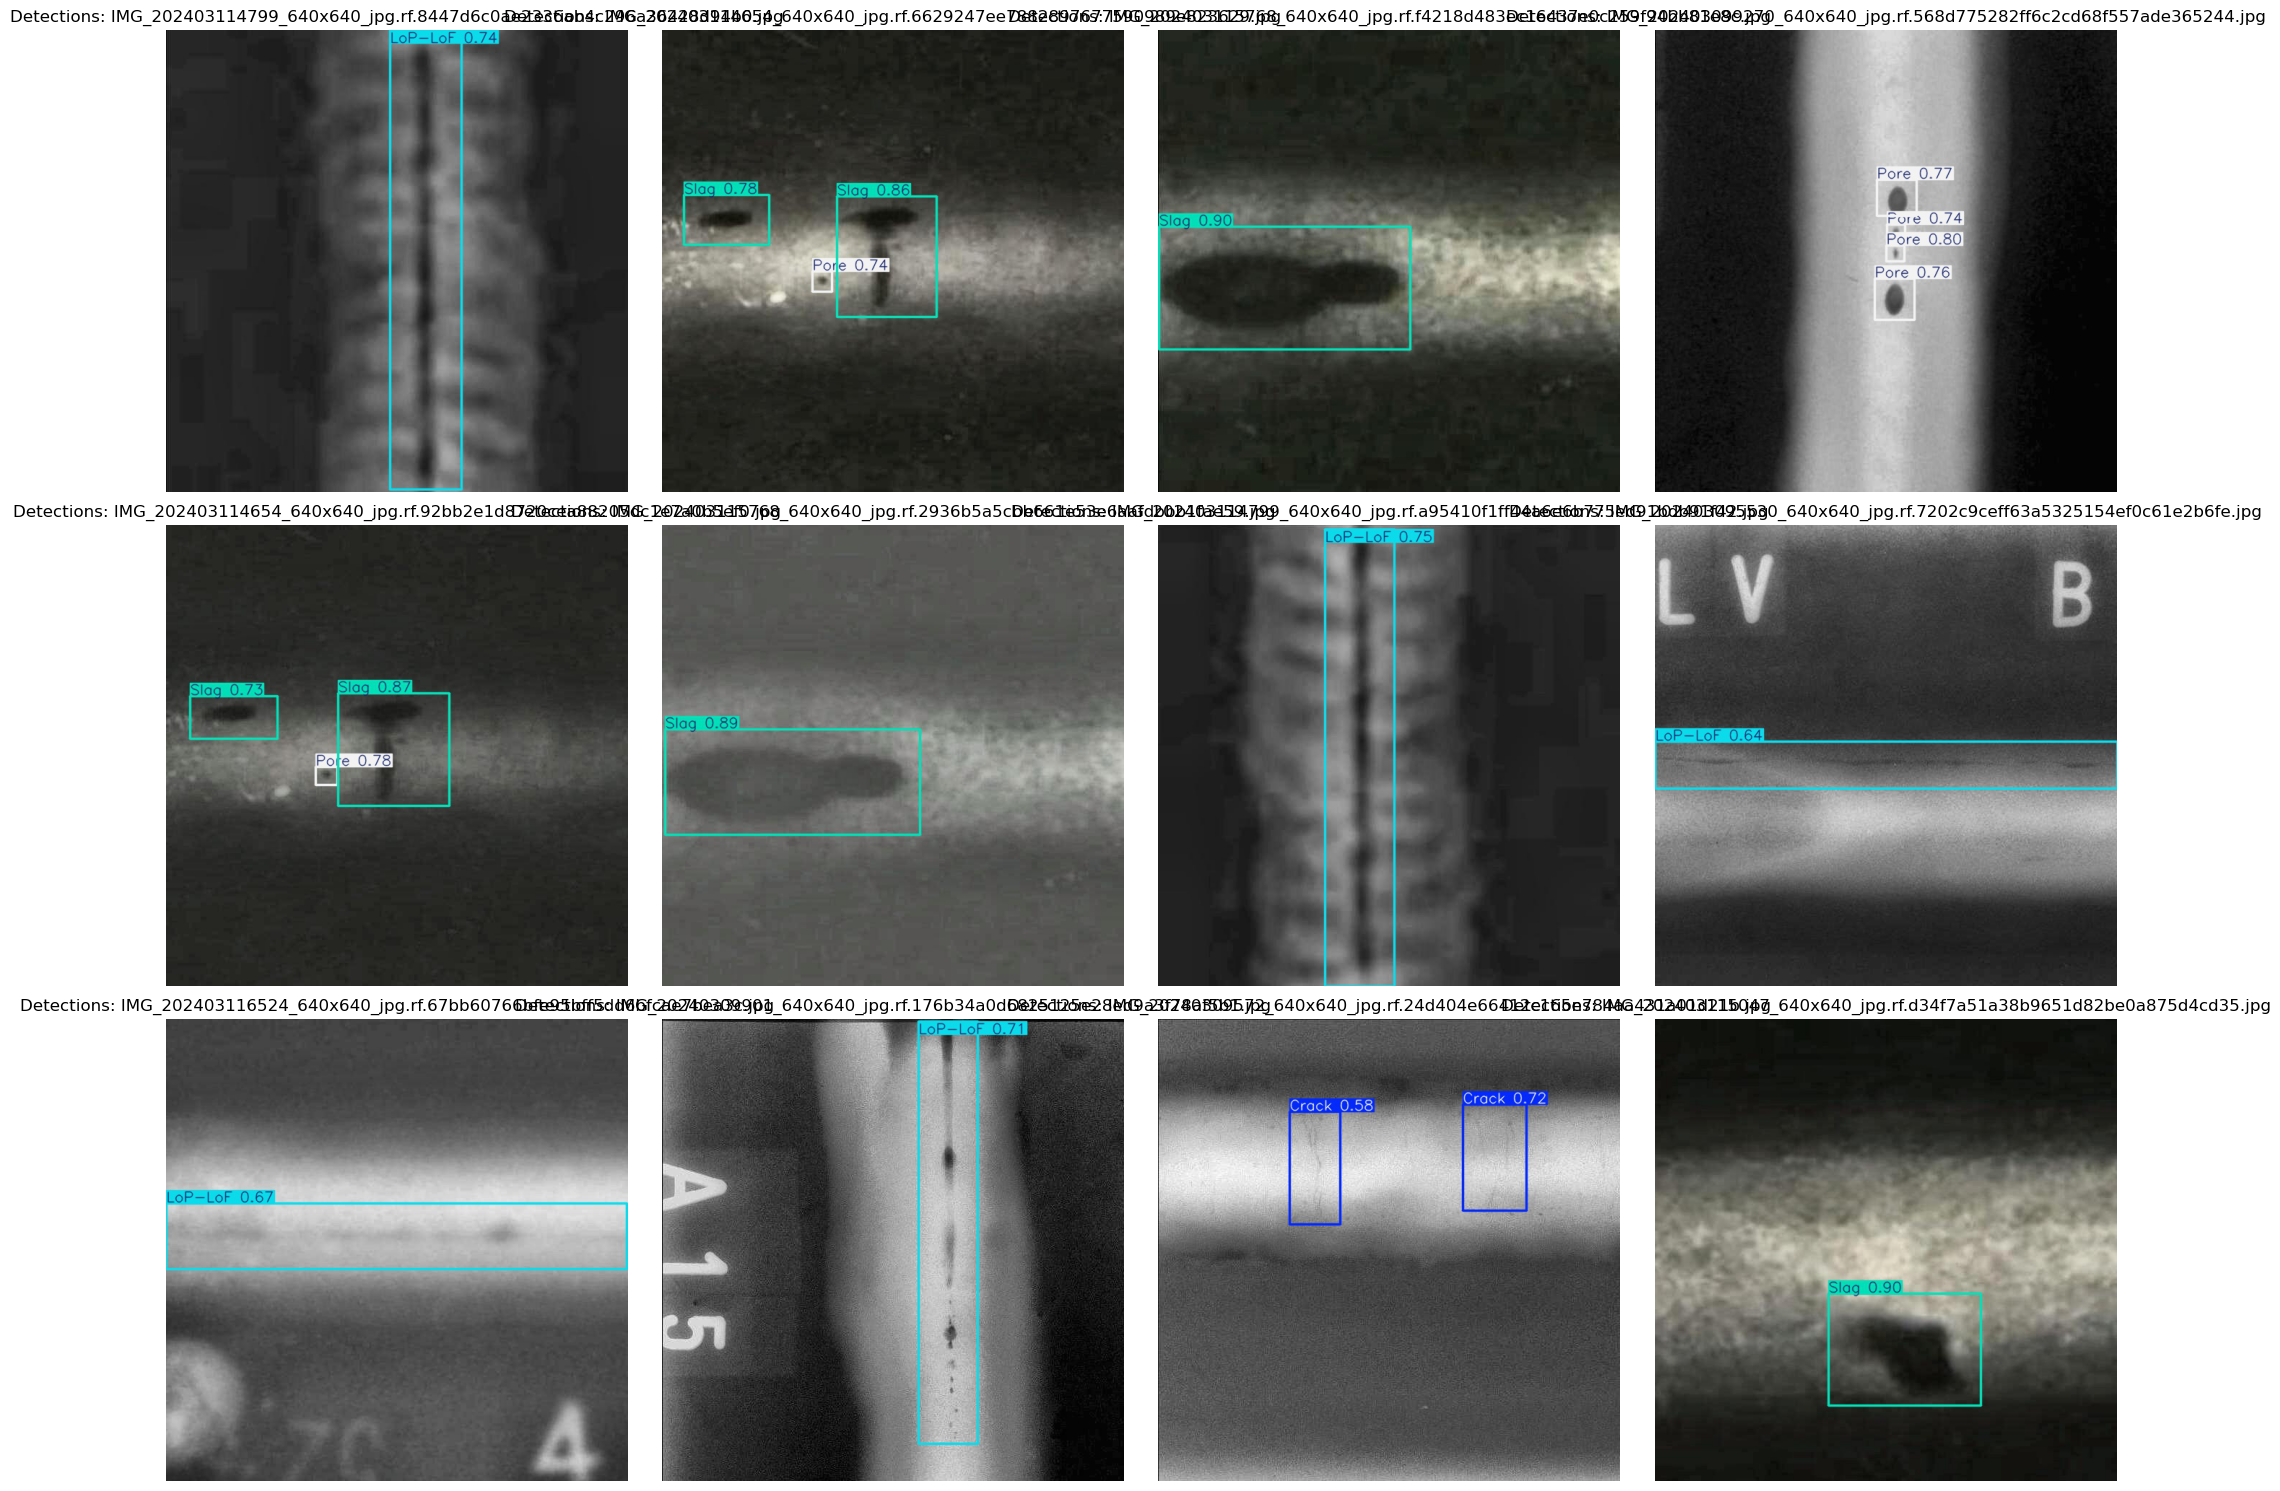

In [12]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from PIL import Image
 
def display_results(model, img_dir, num_images=12, conf_threshold=0.25, save_dir='runs/detect/exp'):
    """
    Evaluate the model and display results with comprehensive visualization
    
    Args:
        model: Trained YOLO model
        img_dir: Directory containing test images
        num_images: Number of random images to process
        conf_threshold: Confidence threshold for detections
        save_dir: Directory to save result images
    """
    # Ensure save directory exists
    os.makedirs(save_dir, exist_ok=True)
    
    # Filter valid image files
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tif']
    images = [f for f in os.listdir(img_dir) if os.path.splitext(f)[1].lower() in valid_extensions]
    
    # Randomly sample images
    sample_images = random.sample(images, min(num_images, len(images)))
    
    # Prepare subplot grid
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    axes = axes.ravel()
    
    for idx, image_name in enumerate(sample_images):
        # Construct full image path
        image_path = os.path.join(img_dir, image_name)
        
        try:
            # Perform inference with confidence threshold
            results = model(image_path, conf=conf_threshold)
            
            # Plot and save results
            for result in results:
                # Save annotated image
                result_path = os.path.join(save_dir, f'result_{image_name}')
                result.save(result_path)
                
                # Read the annotated image
                img = cv2.imread(result_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                # Display on subplot
                axes[idx].imshow(img)
                axes[idx].set_title(f'Detections: {image_name}')
                axes[idx].axis('off')
                
                # Print detection details
                print(f"\nDetections in {image_name}:")
                if len(result.boxes) > 0:
                    for box in result.boxes:
                        cls = int(box.cls[0])
                        conf = float(box.conf[0])
                        print(f"  - {model.names[cls]}: Confidence {conf:.2f}")
                else:
                    print("  No detections found")
        
        except Exception as e:
            print(f"Error processing {image_name}: {e}")
            # Display a blank or error image if processing fails
            axes[idx].text(0.5, 0.5, f'Error: {e}', 
                            horizontalalignment='center', 
                            verticalalignment='center')
            axes[idx].axis('off')
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Usage example
print("Displaying results from model trained on version 1 with augmentation:")
display_results(
    model, 
    os.path.join(v1_dir, 'test/images'), 
    num_images=12,  # Adjust number of images to display
    conf_threshold=0.25  # Adjust confidence threshold
)